# EDA of Property Data

In [86]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [87]:
#import file in dataframe
df1 = pd.read_csv('../Downloads/EDA/train.csv')

In [88]:
#DataSet
#SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.
#MSSubClass: The building class
#MSZoning: The general zoning classification
#LotFrontage: Linear feet of street connected to property
#LotArea: Lot size in square feet
#Street: Type of road access
#Alley: Type of alley access
#LotShape: General shape of property
#LandContour: Flatness of the property
#Utilities: Type of utilities available
#LotConfig: Lot configuration
#LandSlope: Slope of property
#Neighborhood: Physical locations within Ames city limits
#Condition1: Proximity to main road or railroad
#Condition2: Proximity to main road or railroad (if a second is present)
#BldgType: Type of dwelling
#HouseStyle: Style of dwelling
#OverallQual: Overall material and finish quality
#OverallCond: Overall condition rating
#YearBuilt: Original construction date
#YearRemodAdd: Remodel date
#RoofStyle: Type of roof
#RoofMatl: Roof material
#Exterior1st: Exterior covering on house
#Exterior2nd: Exterior covering on house (if more than one material)
#MasVnrType: Masonry veneer type
#MasVnrArea: Masonry veneer area in square feet
#ExterQual: Exterior material quality
#ExterCond: Present condition of the material on the exterior
#Foundation: Type of foundation
#BsmtQual: Height of the basement
#BsmtCond: General condition of the basement
#BsmtExposure: Walkout or garden level basement walls
#BsmtFinType1: Quality of basement finished area
#BsmtFinSF1: Type 1 finished square feet
#BsmtFinType2: Quality of second finished area (if present)
#BsmtFinSF2: Type 2 finished square feet
#BsmtUnfSF: Unfinished square feet of basement area
#TotalBsmtSF: Total square feet of basement area
#Heating: Type of heating
#HeatingQC: Heating quality and condition
#CentralAir: Central air conditioning
#Electrical: Electrical system
#1stFlrSF: First Floor square feet
#2ndFlrSF: Second floor square feet
#LowQualFinSF: Low quality finished square feet (all floors)
#GrLivArea: Above grade (ground) living area square feet
#BsmtFullBath: Basement full bathrooms
#BsmtHalfBath: Basement half bathrooms
#FullBath: Full bathrooms above grade
#HalfBath: Half baths above grade
#Bedroom: Number of bedrooms above basement level
#Kitchen: Number of kitchens
#KitchenQual: Kitchen quality
#TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
#Functional: Home functionality rating
#Fireplaces: Number of fireplaces
#FireplaceQu: Fireplace quality
#GarageType: Garage location
#GarageYrBlt: Year garage was built
#GarageFinish: Interior finish of the garage
#GarageCars: Size of garage in car capacity
#GarageArea: Size of garage in square feet
#GarageQual: Garage quality
#GarageCond: Garage condition
#PavedDrive: Paved driveway
#WoodDeckSF: Wood deck area in square feet
#OpenPorchSF: Open porch area in square feet
#EnclosedPorch: Enclosed porch area in square feet
#3SsnPorch: Three season porch area in square feet
#ScreenPorch: Screen porch area in square feet
#PoolArea: Pool area in square feet
#PoolQC: Pool quality
#Fence: Fence quality
#MiscFeature: Miscellaneous feature not covered in other categories
#MiscVal: $Value of miscellaneous feature
#MoSold: Month Sold
#YrSold: Year Sold
#SaleType: Type of sale
#SaleCondition: Condition of sale

In [89]:
#Column names
df1.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

# Analysing 'SalePrice' Data

In [90]:
#stats summary of SalePrice
df1['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

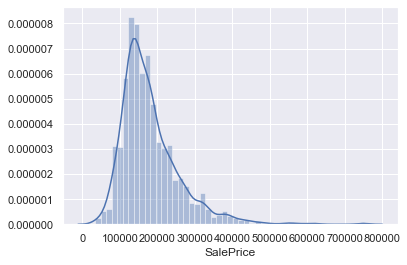

In [91]:
# data distribution of a variable against the density distribution 
#also known as univariate distribution
sns.distplot(df1['SalePrice']);

conclusion from above
<ul>Deviate from the normal distribution.</ul>
<ul>Have appreciable positive skewness.</ul>
<ul>Shows peakedness.</ul>

In [92]:
#skewness and kurtosis
print("Skewness: %f" % df1['SalePrice'].skew())
print("Kurtosis: %f" % df1['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


#A perfectly symmetrical data set will have a skewness of 0. The normal distribution has a skewness of 0. If skewness is less than -1 or greater than 1, the distribution is highly skewed. If skewness is between -1 and -0.5 or between 0.5 and 1, the distribution is moderately skewed. If skewness is between -0.5 and 0.5, the distribution is approximately symmetric.

### Relationship with numerical variables

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


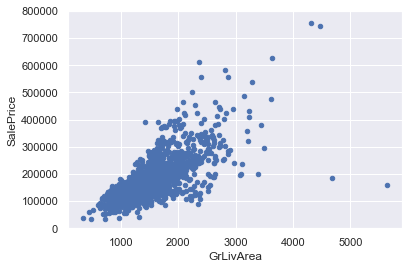

In [93]:
#scatter plot grlivarea/saleprice
#Above grade (ground) living area square feet vs SalePrice
var = 'GrLivArea'
data = pd.concat([df1['SalePrice'], df1[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


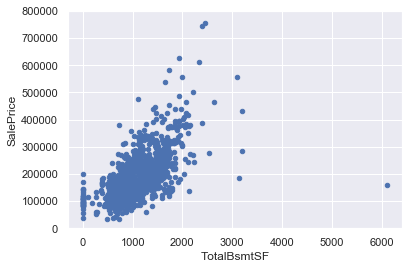

In [94]:
#scatter plot totalbsmtsf (Total square feet of basement area)/saleprice
var = 'TotalBsmtSF'
data = pd.concat([df1['SalePrice'], df1[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

### Relationship with categorical features

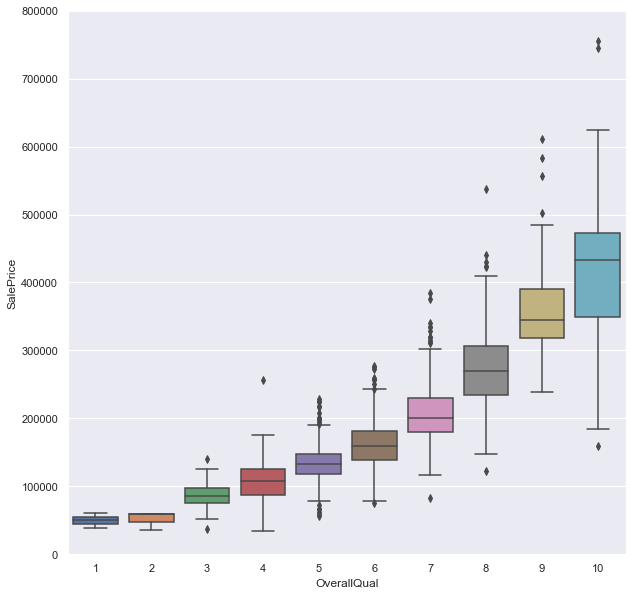

In [95]:
#box plot overallqual (Overall material and finish quality/saleprice
var = 'OverallQual'
data = pd.concat([df1['SalePrice'], df1[var]], axis=1)
f, ax = plt.subplots(figsize=(10, 10))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

'SalePrice' and 'OverallQual' are related as seen above.

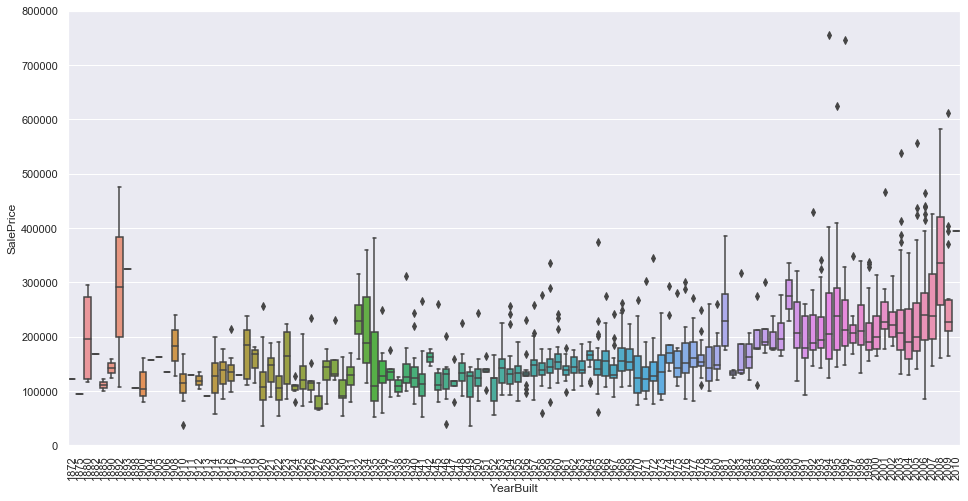

In [96]:
var = 'YearBuilt'
data = pd.concat([df1['SalePrice'], df1[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);
plt.xticks(rotation=90);

We can clearly see that population is more interested in buying houses built in recent years than that in old times.

We don't know if 'SalePrice' is in constant prices. Constant prices try to remove the effect of inflation. If 'SalePrice' is not in constant prices, it should be, so than prices are comparable over the years.

## Conclusion from above:

* 'GrLivArea' and 'TotalBsmtSF' seem to be linearly related with 'SalePrice'. Both relationships are positive, which means that as one variable increases, the other also increases. In the case of 'TotalBsmtSF', we can see that the slope of the linear relationship is particularly high.
* 'OverallQual' and 'YearBuilt' also seem to be related with 'SalePrice'. The relationship seems to be stronger in the case of 'OverallQual', where the box plot shows how sales prices increase with the overall quality.


### See how variables are co-related to each other:

* Correlation matrix (heatmap style).
* 'SalePrice' correlation matrix (zoomed heatmap style).
* Scatter plots between the most correlated variables (move like Jagger style).

#### Correlation matrix (heatmap style)

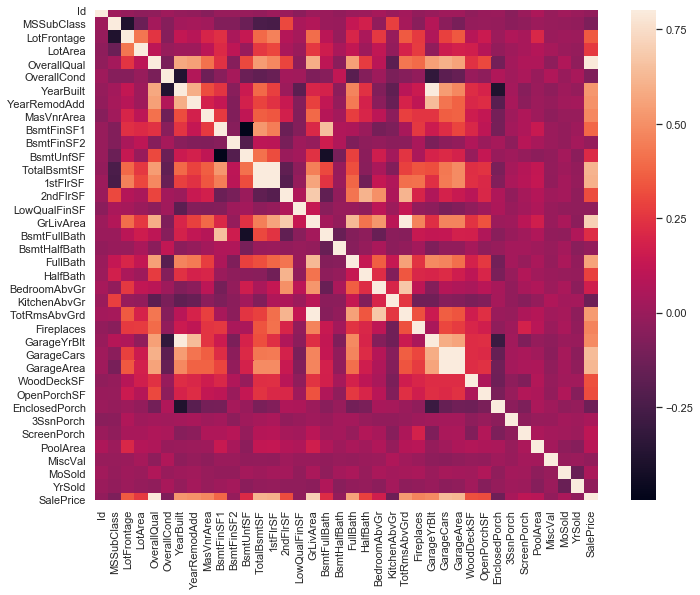

In [97]:
#correlation matrix
corrmat = df1.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

Heatmap is the best way to get a quick overview of variable relationship

Heatmaps are great to detect this kind of situations and in problems dominated by feature selection,they are an essential tool.

Also observe 'SalePrice' correlations. We can see that 'GrLivArea', 'TotalBsmtSF', and 'OverallQual' are corelated, However other variables should also be taken into consideration.

#### 'SalePrice' correlation matrix (zoomed heatmap style)

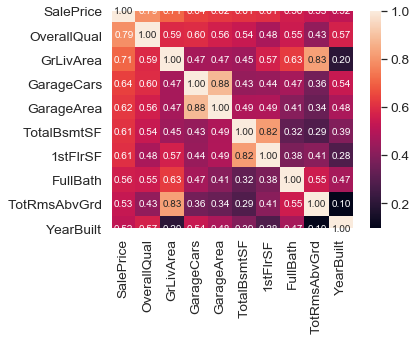

In [98]:
#saleprice correlation matrix
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index 
#Return the first n rows with the largest values in columns, in descending order. 
#The columns that are not specified are returned as well, but not used for ordering.
cm = np.corrcoef(df1[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

According to above plot, these are the variables most correlated with 'SalePrice'. My thoughts on this:

* 'OverallQual', 'GrLivArea' and 'TotalBsmtSF' are strongly correlated with 'SalePrice'. Check!
* 'GarageCars' and 'GarageArea' are also some of the most strongly correlated variables. However, as we discussed in the last sub-point, the number of cars that fit into the garage is a consequence of the garage area. 'GarageCars' and 'GarageArea' are like twin brothers. You'll never be able to distinguish them. Therefore, we just need one of these variables in our analysis (we can keep 'GarageCars' since its correlation with 'SalePrice' is higher).
* 'TotalBsmtSF' and '1stFloor' also seem to be twin brothers. We can keep 'TotalBsmtSF' just to say that our first guess was right (re-read 'So... What can we expect?').
* 'FullBath'?? Really? 
* 'TotRmsAbvGrd' and 'GrLivArea', twin brothers again. Is this dataset from Chernobyl?
* 'YearBuilt' is slightly correlated with 'SalePrice'.

#### Scatter plots between 'SalePrice' and correlated variables

In [99]:
#scatterplot
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(df1[cols], size = )
plt.show();

SyntaxError: invalid syntax (<ipython-input-99-de4bdc130a31>, line 4)

This scatter plot gives us a reasonable idea about variables relationships.


# Missing data


In [100]:
#missing data
total = df1.isnull().sum().sort_values(ascending=False)
percent = (df1.isnull().sum()/df1.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


# Outliers

Outliers is also something that we should be aware of. Why? Because outliers can markedly affect our models and can be a valuable source of information, providing us insights about specific behaviours.

Outliers is a complex subject and it deserves more attention. Here, we'll just do a quick analysis through the standard deviation of 'SalePrice' and a set of scatter plots.

### Univariate analysis

The primary concern here is to establish a threshold that defines an observation as an outlier. To do so, we'll standardize the data. In this context, data standardization means converting data values to have mean of 0 and a standard deviation of 1.

In [101]:
#standardizing data
saleprice_scaled = StandardScaler().fit_transform(df1['SalePrice'][:,np.newaxis]);
low_range = saleprice_scaled[saleprice_scaled[:,0].argsort()][:10]
high_range= saleprice_scaled[saleprice_scaled[:,0].argsort()][-10:]
print('outer range (low) of the distribution:')
print(low_range)
print('\nouter range (high) of the distribution:')
print(high_range)

outer range (low) of the distribution:
[[-1.83870376]
 [-1.83352844]
 [-1.80092766]
 [-1.78329881]
 [-1.77448439]
 [-1.62337999]
 [-1.61708398]
 [-1.58560389]
 [-1.58560389]
 [-1.5731    ]]

outer range (high) of the distribution:
[[3.82897043]
 [4.04098249]
 [4.49634819]
 [4.71041276]
 [4.73032076]
 [5.06214602]
 [5.42383959]
 [5.59185509]
 [7.10289909]
 [7.22881942]]


How 'SalePrice' looks with her new clothes:

* Low range values are similar and not too far from 0.
* High range values are far from 0 and the 7.something values are really out of range.

For now, we'll not consider any of these values as an outlier but we should be careful with those two 7.something values.

### Bivariate analysis

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


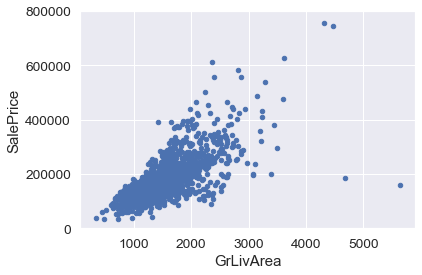

In [102]:
#bivariate analysis saleprice/grlivarea
var = 'GrLivArea'
data = pd.concat([df1['SalePrice'], df1[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

What has been revealed:

* The two values with bigger 'GrLivArea' seem strange and they are not following the crowd. We can speculate why this is happening. Maybe they refer to agricultural area and that could explain the low price. I'm not sure about this but I'm quite confident that these two points are not representative of the typical case. Therefore, we'll define them as outliers and delete them.
* The two observations in the top of the plot are those 7.something observations that we said we should be careful about. They look like two special cases, however they seem to be following the trend. For that reason, we will keep them.

In [103]:
#deleting points
df1.sort_values(by = 'GrLivArea', ascending = False)[:2]
df1 = df1.drop(df1[df1['Id'] == 1299].index)
df1 = df1.drop(df1[df1['Id'] == 524].index)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


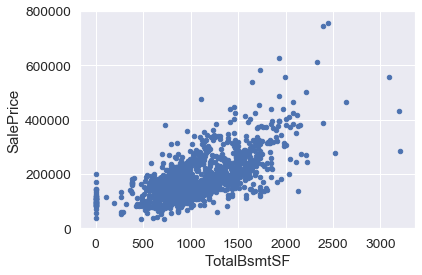

In [104]:
#bivariate analysis saleprice/grlivarea
var = 'TotalBsmtSF'
data = pd.concat([df1['SalePrice'], df1[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));



* <b>Normality</b> - When we talk about normality what we mean is that the data should look like a normal distribution. This is important because several statistic tests rely  on this (e.g. t-statistics). In this exercise we'll just check univariate normality for 'SalePrice' (which is a limited approach). Remember that univariate normality doesn't ensure multivariate normality (which is what we would like to have), but it helps. Another detail to take into account is that in big samples (>200 observations) normality is not such an issue. However, if we solve normality, we avoid a lot of other problems (e.g. heteroscedacity) so that's the main reason why we are doing this analysis.

* <b>Linearity</b>- The most common way to assess linearity is to examine scatter plots and search for linear patterns. If patterns are not linear, it would be worthwhile to explore data transformations. However, we'll not get into this because most of the scatter plots we've seen appear to have linear relationships.

* <b>Absence of correlated errors</b> - Correlated errors, like the definition suggests, happen when one error is correlated to another. For instance, if one positive error makes a negative error systematically, it means that there's a relationship between these variables. This occurs often in time series, where some patterns are time related. We'll also not get into this. However, if you detect something, try to add a variable that can explain the effect you're getting. That's the most common solution for correlated errors.



### In the search for normality

The point here is to test 'SalePrice' in a very lean way. We'll do this paying attention to:

* <b>Histogram</b> - Kurtosis and skewness.
* <b>Normal probability plot</b> - Data distribution should closely follow the diagonal that represents the normal distribution.

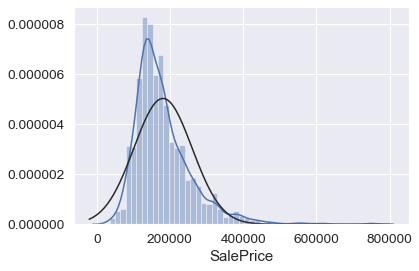

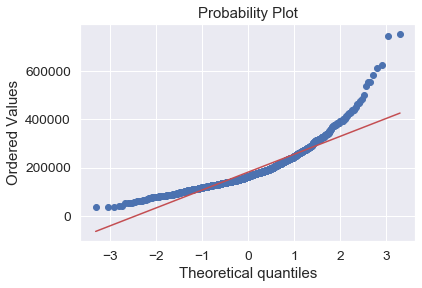

In [105]:
#histogram and normal probability plot
sns.distplot(df1['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(df1['SalePrice'], plot=plt)

Ok, 'SalePrice' is not normal. It shows 'peakedness', positive skewness and does not follow the diagonal line.

But everything's not lost. A simple data transformation can solve the problem. This is one of the awesome things you can learn in statistical books: in case of positive skewness, log transformations usually works well. When I discovered this, I felt like an Hogwarts' student discovering a new cool spell.

*Avada kedavra!*

In [106]:
#applying log transformation
df1['SalePrice'] = np.log(df1['SalePrice'])

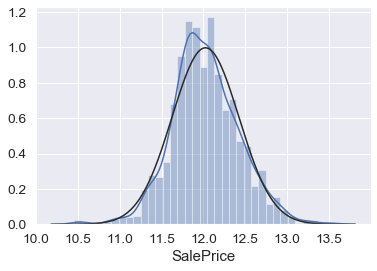

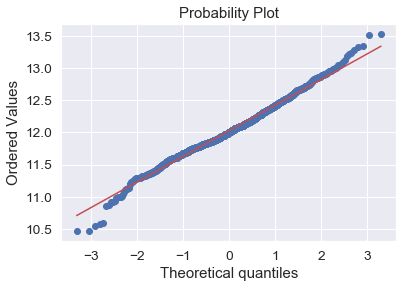

In [107]:
#transformed histogram and normal probability plot
sns.distplot(df1['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(df1['SalePrice'], plot=plt)

Done! Let's check what's going on with 'GrLivArea'.

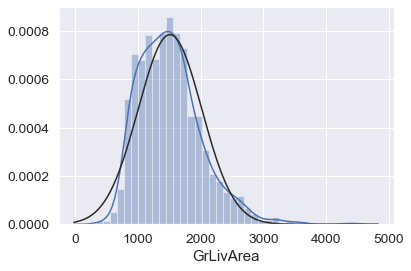

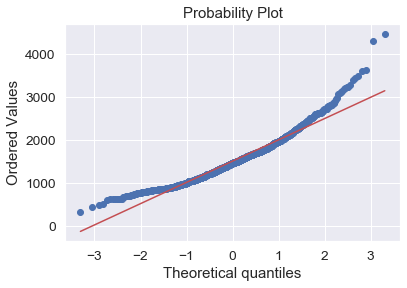

In [108]:
#histogram and normal probability plot
sns.distplot(df1['GrLivArea'], fit=norm);
fig = plt.figure()
res = stats.probplot(df1['GrLivArea'], plot=plt)

In [109]:
#data transformation
df1['GrLivArea'] = np.log(df1['GrLivArea'])

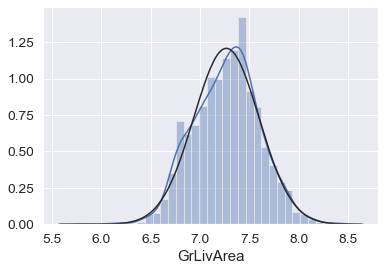

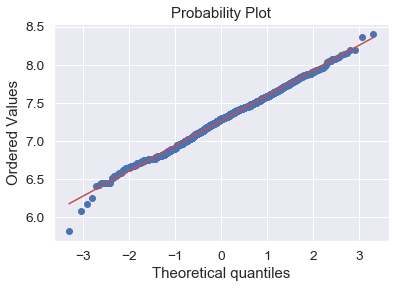

In [110]:
#transformed histogram and normal probability plot
sns.distplot(df1['GrLivArea'], fit=norm);
fig = plt.figure()
res = stats.probplot(df1['GrLivArea'], plot=plt)

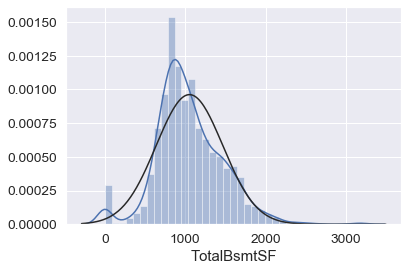

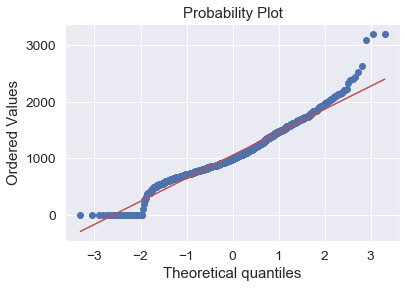

In [111]:
#histogram and normal probability plot
sns.distplot(df1['TotalBsmtSF'], fit=norm);
fig = plt.figure()
res = stats.probplot(df1['TotalBsmtSF'], plot=plt)


* Something that, in general, presents skewness.
* A significant number of observations with value zero (houses without basement).
* A big problem because the value zero doesn't allow us to do log transformations.

To apply a log transformation here, we'll create a variable that can get the effect of having or not having basement (binary variable). Then, we'll do a log transformation to all the non-zero observations, ignoring those with value zero. This way we can transform data, without losing the effect of having or not basement.

I'm not sure if this approach is correct. It just seemed right to me. That's what I call 'high risk engineering'.

In [112]:
#create column for new variable (one is enough because it's a binary categorical feature)
#if area>0 it gets 1, for area==0 it gets 0
df1['HasBsmt'] = pd.Series(len(df1['TotalBsmtSF']), index=df1.index)
df1['HasBsmt'] = 0 
df1.loc[df1['TotalBsmtSF']>0,'HasBsmt'] = 1

In [113]:
#transform data
df1.loc[df1['HasBsmt']==1,'TotalBsmtSF'] = np.log(df1['TotalBsmtSF'])

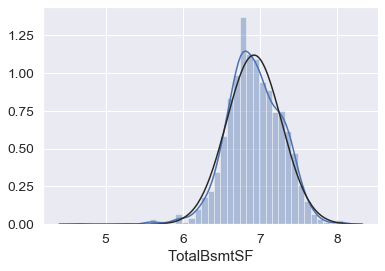

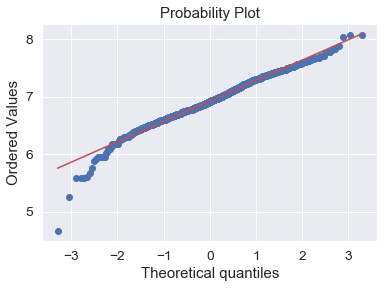

In [114]:
#histogram and normal probability plot
sns.distplot(df1[df1['TotalBsmtSF']>0]['TotalBsmtSF'], fit=norm);
fig = plt.figure()
res = stats.probplot(df1[df1['TotalBsmtSF']>0]['TotalBsmtSF'], plot=plt)

### In the search for writing 'homoscedasticity' right at the first attempt

The best approach to test homoscedasticity for two metric variables is graphically. Departures from an equal dispersion are shown by such shapes as cones (small dispersion at one side of the graph, large dispersion at the opposite side) or diamonds (a large number of points at the center of the distribution).

Starting by 'SalePrice' and 'GrLivArea'...

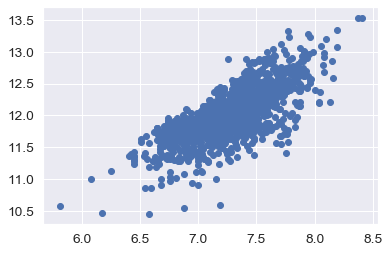

In [115]:
#scatter plot
plt.scatter(df1['GrLivArea'], df1['SalePrice']);

Older versions of this scatter plot (previous to log transformations), had a conic shape (go back and check 'Scatter plots between 'SalePrice' and correlated variables (move like Jagger style)'). As you can see, the current scatter plot doesn't have a conic shape anymore. That's the power of normality! Just by ensuring normality in some variables, we solved the homoscedasticity problem.

Below plot is for 'SalePrice' with 'TotalBsmtSF'.

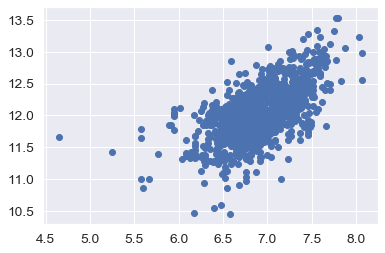

In [116]:
#scatter plot
plt.scatter(df1[df1['TotalBsmtSF']>0]['TotalBsmtSF'], df1[df1['TotalBsmtSF']>0]['SalePrice']);

We can say that, in general, 'SalePrice' exhibit equal levels of variance across the range of 'TotalBsmtSF'.